<a href="https://colab.research.google.com/github/daxausername/classic_classification/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/CreditScoring2_Statistica.csv', sep = ';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2500 non-null   object
 1   Marital Status          2500 non-null   object
 2   Age Range               2500 non-null   object
 3   Customer's Age          2500 non-null   int64 
 4   Income Range            2500 non-null   object
 5   Monthly Income          2500 non-null   int64 
 6   Number of Kids          2500 non-null   object
 7   Number of Credit Cards  2500 non-null   object
 8   How Paid?               2500 non-null   object
 9   Mortgage                2500 non-null   object
 10  Number of Storecards    2500 non-null   object
 11  Number of Loans         2500 non-null   object
 12  Type of Risk            2500 non-null   object
dtypes: int64(2), object(11)
memory usage: 254.0+ KB


In [ ]:
data.head()

,Gender,Marital Status,Age Range,Customer's Age,Income Range,Monthly Income,Number of Kids,Number of Credit Cards,How Paid?,Mortgage,Number of Storecards,Number of Loans,Type of Risk
0,Female,Married,AgeRng 18-25,24,IncRng 15-30K,15863,Two,One,Monthly,Have,Three,One,Bad Profit
1,Male,Married,AgeRng 18-25,20,IncRng 15-30K,15855,Two,Two,Monthly,Have,Two,One,Bad Profit
2,Male,Single,AgeRng 26-40,26,IncRng 15-30K,15846,No kids,Two,Monthly,Dont have,Two,One,Bad Profit
3,Male,Single,AgeRng 26-40,31,IncRng 15-30K,15841,One,One,Weekly,Have,Two,One,Bad Profit
4,Male,Married,AgeRng 41-50,48,IncRng 15-30K,15800,Three,Three,Weekly,Have,Four,Two,Bad Loss


In [ ]:
data['Age'] = data["Customer's Age"]

In [ ]:
for col in data.drop(['Age', 'Monthly Income'], axis = True):
  print(col, '->', data[col].unique(), '\n количество = ', len(data[col].unique()))

Gender -> ['Female' 'Male'] 
 количество =  2
Marital Status -> ['Married' 'Single' 'SepWid'] 
 количество =  3
Age Range -> ['AgeRng 18-25' 'AgeRng 26-40' 'AgeRng 41-50'] 
 количество =  3
Customer's Age -> [24 20 26 31 48 32 33 18 34 43 21 23 22 42 47 46 37 19 36 44 38 29 41 49
 40 25 45 30 28 35 39 27 50] 
 количество =  33
Income Range -> ['IncRng 15-30K' 'IncRng 46-60K' 'IncRng 31-45K'] 
 количество =  3
Number of Kids -> ['Two' 'No kids' 'One' 'Three' 'Four'] 
 количество =  5
Number of Credit Cards -> ['One' 'Two' 'Three' 'Six' 'Four' 'Five' 'No cards'] 
 количество =  7
How Paid? -> ['Monthly' 'Weekly'] 
 количество =  2
Mortgage -> ['Have' 'Dont have'] 
 количество =  2
Number of Storecards -> ['Three' 'Two' 'Four' 'One' 'Five' 'No cards'] 
 количество =  6
Number of Loans -> ['One' 'Two' 'Three' 'Zero'] 
 количество =  4
Type of Risk -> ['Bad Profit' 'Bad Loss' 'Good Profit'] 
 количество =  3


In [ ]:
print(data['Age Range'][data['Age Range'] == 'AgeRng 26-40'].count())
print(data['Age Range'][data['Age Range'] == 'AgeRng 18-25'].count())
print(data['Age Range'][data['Age Range'] == 'AgeRng 41-50'].count())

819
1002
679


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer's Age,2500.0,31.9380,9.888684,18.0,23.00,31.0,41.00,50.0
Monthly Income,2500.0,25695.8368,8782.035018,15018.0,20586.75,23637.5,27620.25,59944.0
Age,2500.0,31.9380,9.888684,18.0,23.00,31.0,41.00,50.0


In [ ]:
data.drop("Customer's Age", axis = 1, inplace=True)

In [ ]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(data[['Age', 'Monthly Income']])

In [ ]:
data[['Age_scale', 'Monthly Income_scale']] = scaled_data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly Income,2500.0,2.569584e+04,8782.035018,15018.000000,20586.750000,23637.500000,27620.250000,59944.000000
Age,2500.0,3.193800e+01,9.888684,18.000000,23.000000,31.000000,41.000000,50.000000
Age_scale,2500.0,1.364242e-16,1.000200,-1.409772,-0.904042,-0.094875,0.916584,1.826898
Monthly Income_scale,2500.0,-1.364242e-16,1.000200,-1.216116,-0.581882,-0.234427,0.219175,3.900578


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in data.drop(['Age', 'Monthly Income','Age_scale', 'Monthly Income_scale'], axis = True):
  data[i] = label_encoder.fit_transform(data[i])

In [ ]:

data.info()
data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2500 non-null   int64  
 1   Marital Status          2500 non-null   int64  
 2   Age Range               2500 non-null   int64  
 3   Income Range            2500 non-null   int64  
 4   Monthly Income          2500 non-null   int64  
 5   Number of Kids          2500 non-null   int64  
 6   Number of Credit Cards  2500 non-null   int64  
 7   How Paid?               2500 non-null   int64  
 8   Mortgage                2500 non-null   int64  
 9   Number of Storecards    2500 non-null   int64  
 10  Number of Loans         2500 non-null   int64  
 11  Type of Risk            2500 non-null   int64  
 12  Age                     2500 non-null   int64  
 13  Age_scale               2500 non-null   float64
 14  Monthly Income_scale    2500 non-null   

,Gender,Marital Status,Age Range,Income Range,Monthly Income,Number of Kids,Number of Credit Cards,How Paid?,Mortgage,Number of Storecards,Number of Loans,Type of Risk,Age,Age_scale,Monthly Income_scale
0,0,0,0,0,15863,4,3,0,1,4,0,1,24,-0.802896,-1.119878
1,1,0,0,0,15855,4,6,0,1,5,0,1,20,-1.207480,-1.120789


In [ ]:
data[['Age', 'Monthly Income','Age_scale', 'Monthly Income_scale', 'Type of Risk']].groupby('Type of Risk').mean().T

Type of Risk,0,1,2
Age,38.073555,28.313791,36.462617
Monthly Income,26197.418564,23450.247169,32901.974299
Age_scale,0.620586,-0.366574,0.457647
Monthly Income_scale,0.057126,-0.255754,0.820719


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

<Axes: xlabel='Age_scale', ylabel='Monthly Income_scale'>

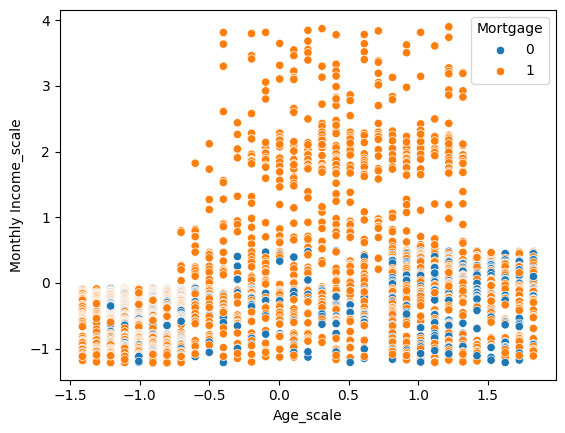

In [ ]:
sns.scatterplot(data, x = 'Age_scale', y = 'Monthly Income_scale', hue ='Mortgage')

<Axes: xlabel='Monthly Income', ylabel='Count'>

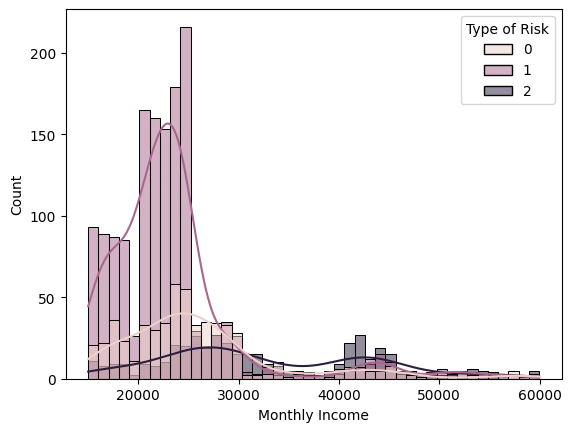

In [ ]:
sns.histplot(data, x = 'Monthly Income', hue = 'Type of Risk', kde = True)


<Axes: xlabel='Age', ylabel='Count'>

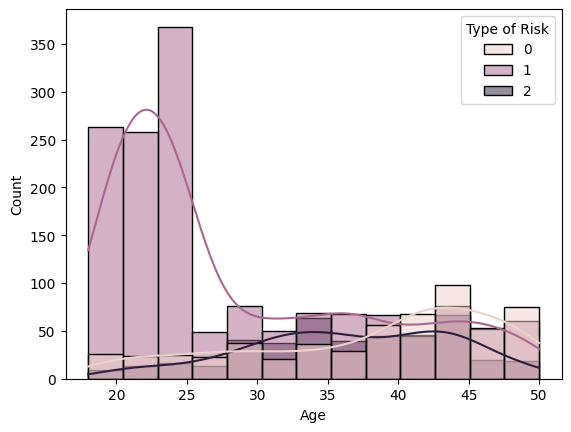

In [ ]:
sns.histplot(data, x = 'Age', hue = 'Type of Risk', kde = True)

<Axes: xlabel='Age', ylabel='Monthly Income'>

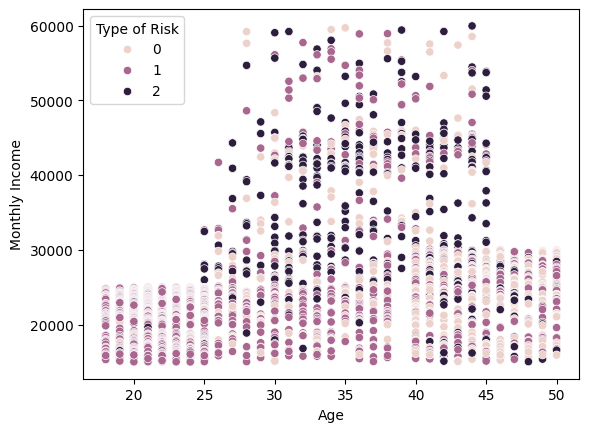

In [ ]:
sns.scatterplot(data, x='Age', y = 'Monthly Income', hue ='Type of Risk')

## Обучение модели 1

In [ ]:
X = data[['Gender', 'Marital Status',  'Number of Kids', 'Number of Credit Cards',
       'How Paid?', 'Mortgage', 'Number of Storecards', 'Number of Loans',
         'Age_scale', 'Monthly Income_scale']]
y = data['Type of Risk']

In [ ]:
names = list(X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

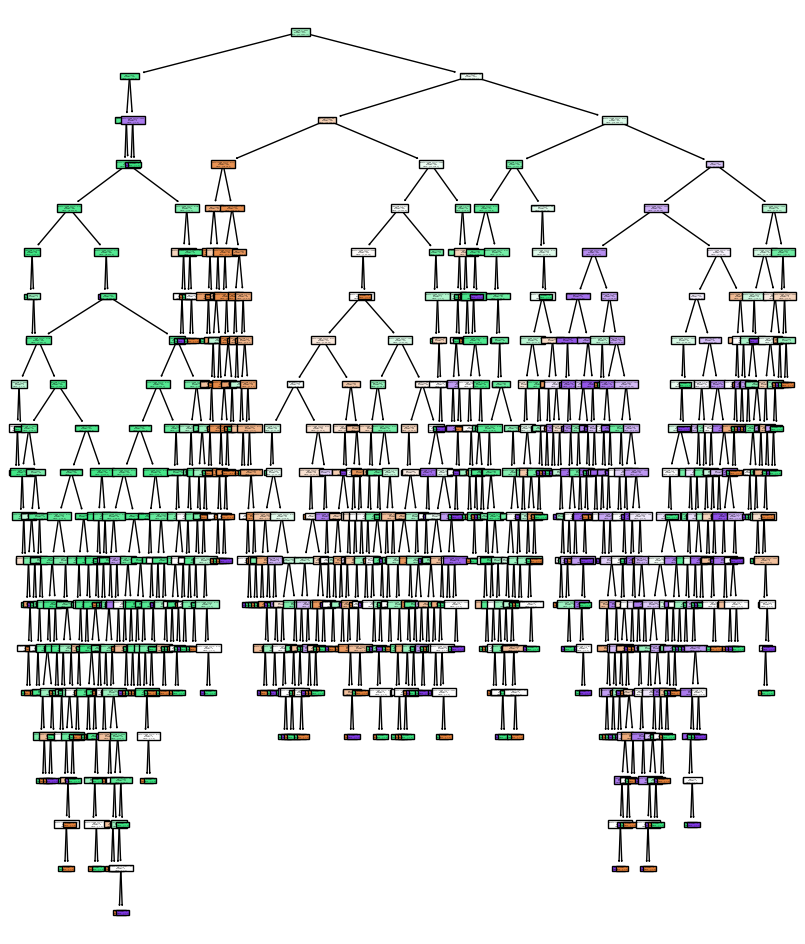

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 12))
plot_tree(tree, feature_names = names, filled=True);

In [ ]:
 tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

За функционал качества при работе с деревом решений принимается **прирост информации** (information gain):

$$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$

In [ ]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей тестовые и прогнозные значения
# поменяем порядок так, чтобы злокачественные опухоли были положительным классом
tree_matrix = confusion_matrix(y_test, y_pred)
print(tree_matrix, 'Матрица ошибок для тестового набора данных')



[[ 75  51  26]
 [ 62 362  38]
 [ 24  49  63]] Матрица ошибок для тестового набора данных


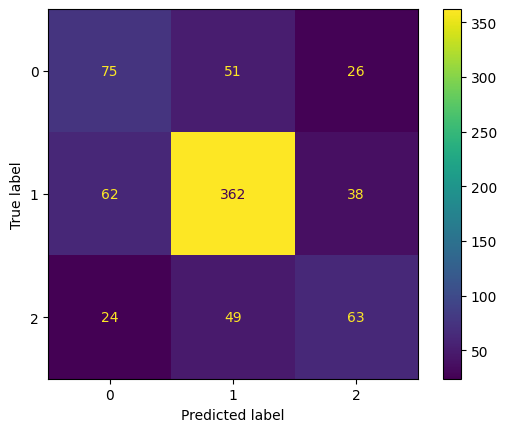

In [ ]:
# для удобства создадим график
from sklearn.metrics import ConfusionMatrixDisplay
disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

model_tree_accuracy = accuracy_score(y_test, y_pred)
round(model_tree_accuracy, 2)

0.67

[[ 419    0    0]
 [   0 1039    0]
 [   0    0  292]] Матрица ошибок для тестового набора данных


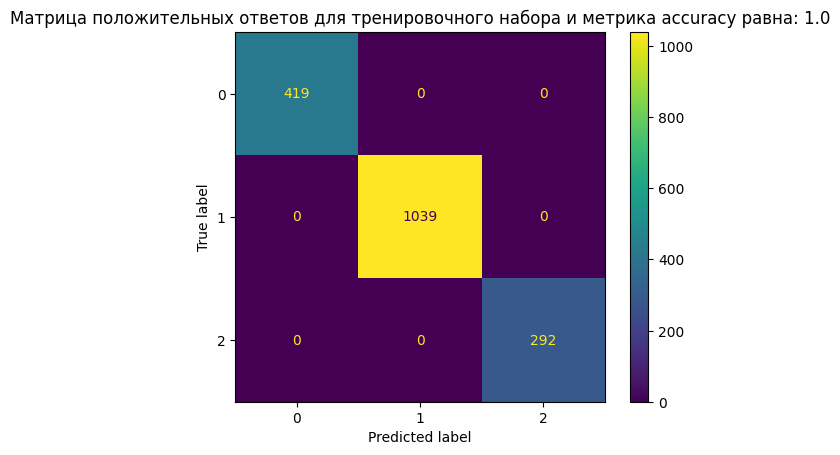

In [ ]:
tree_matrix = confusion_matrix(y_train, y_pred_train)
print(tree_matrix, 'Матрица ошибок для тестового набора данных')
model_tree_accuracy = accuracy_score(y_train, y_pred_train)
AC = 'Матрица положительных ответов для тренировочного набора и метрика accuracy равна: ' + str(round(model_tree_accuracy, 2))

disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

## Обучение модели 2

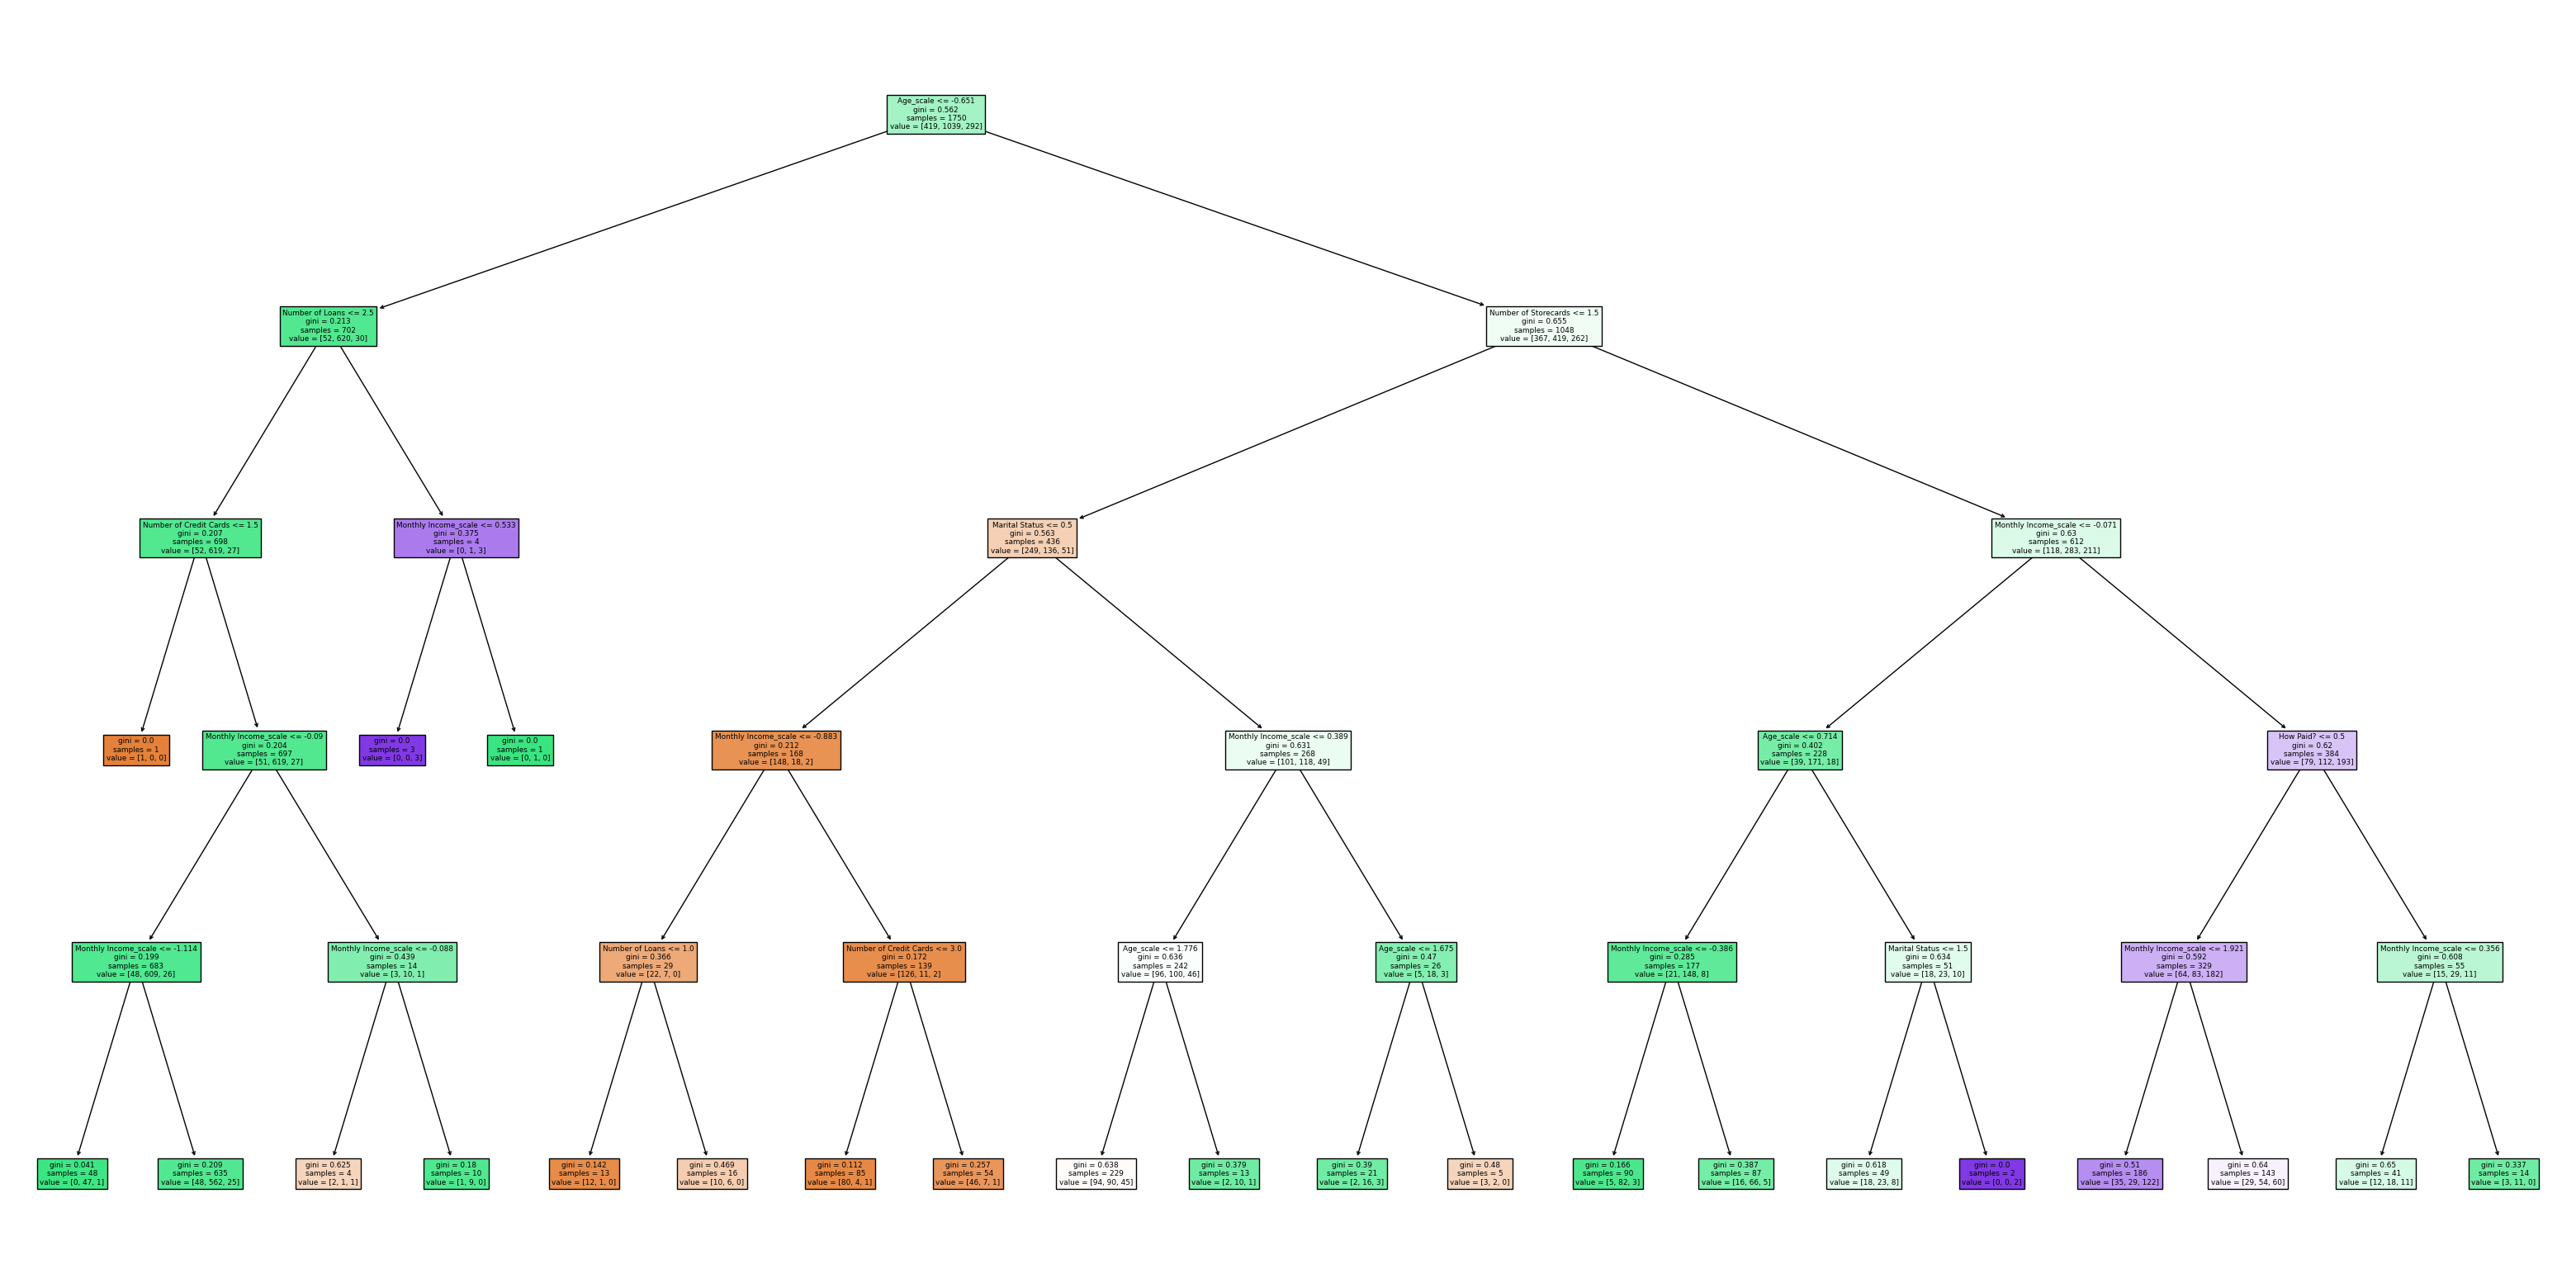

In [ ]:
tree_2 = DecisionTreeClassifier(random_state=1, max_depth = 5)
tree_2.fit(X_train, y_train)


plt.figure(figsize=(40, 20))
plot_tree(tree_2, feature_names = names, filled=True);

In [ ]:
y_pred = tree_2.predict(X_test)
y_pred_train = tree_2.predict(X_train)

[[248 107  64]
 [111 845  83]
 [ 48  57 187]]


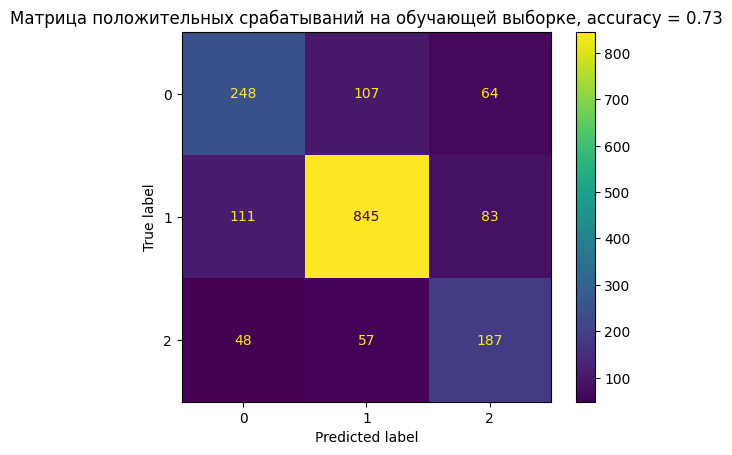

In [ ]:
tree_matrix = confusion_matrix(y_train, y_pred_train)
print(tree_matrix)
model_tree_accuracy = accuracy_score(y_train, y_pred_train)
AC = 'Матрица положительных срабатываний на обучающей выборке, accuracy = ' + str(round(model_tree_accuracy, 2))


disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

[[ 67  54  31]
 [ 42 381  39]
 [ 25  24  87]]


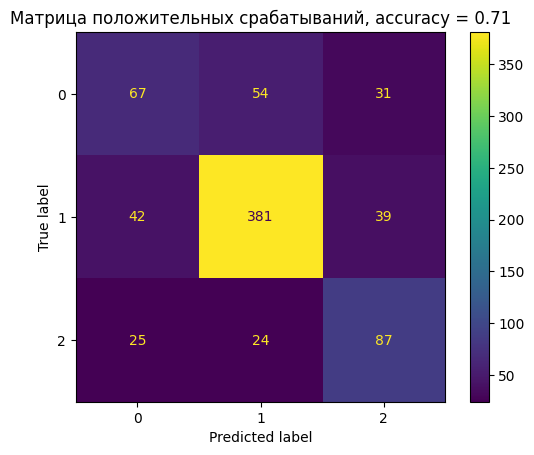

In [ ]:
tree_matrix = confusion_matrix(y_test, y_pred)
print(tree_matrix)
model_tree_accuracy = accuracy_score(y_test, y_pred)
AC = 'Матрица положительных срабатываний, accuracy = ' + str(round(model_tree_accuracy, 2))


disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()


## Обучение модели 3 с критериями останова

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40, min_samples_leaf=5,
                       random_state=1)

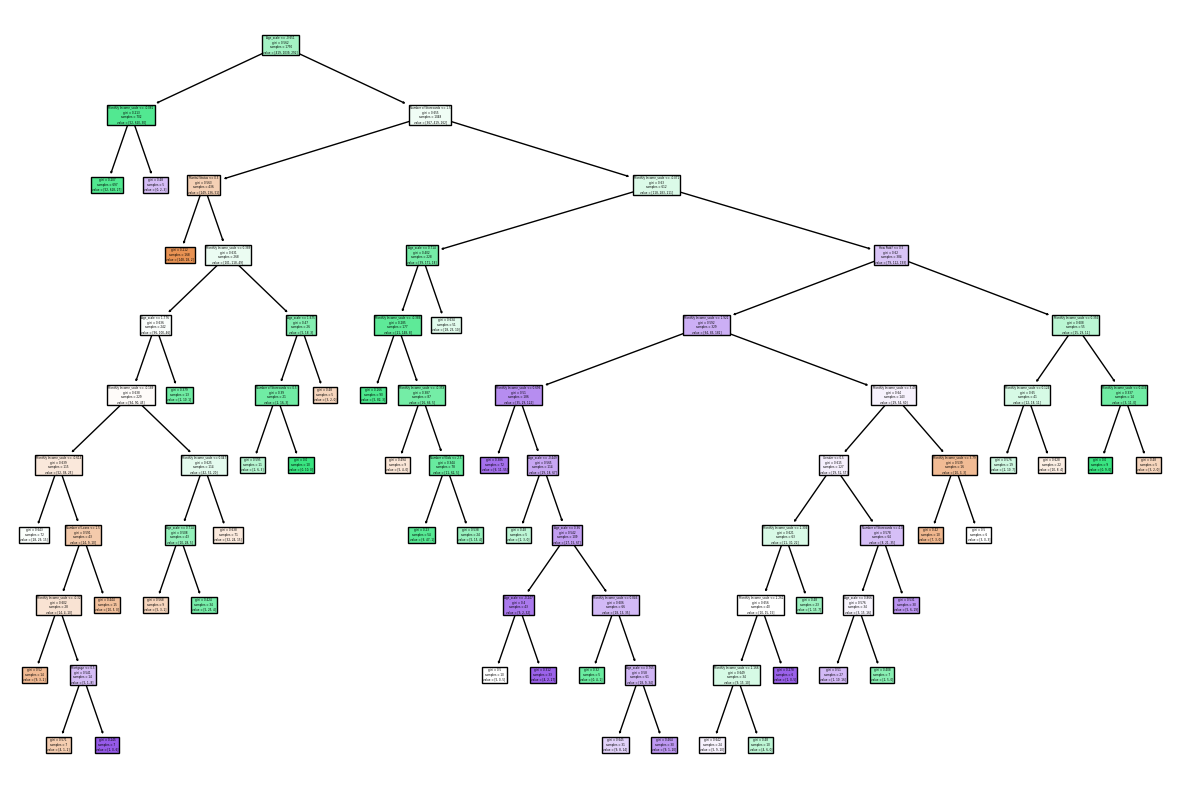

In [ ]:
tree_3 = DecisionTreeClassifier(random_state=1, max_depth = 10, min_samples_leaf=5, max_leaf_nodes = 40 )
tree_3.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree_3, feature_names=names, filled=True);
tree_3

In [ ]:
y_pred = tree_3.predict(X_test)
y_pred_train = tree_3.predict(X_train)

[[244 134  41]
 [ 73 917  49]
 [ 34  83 175]]


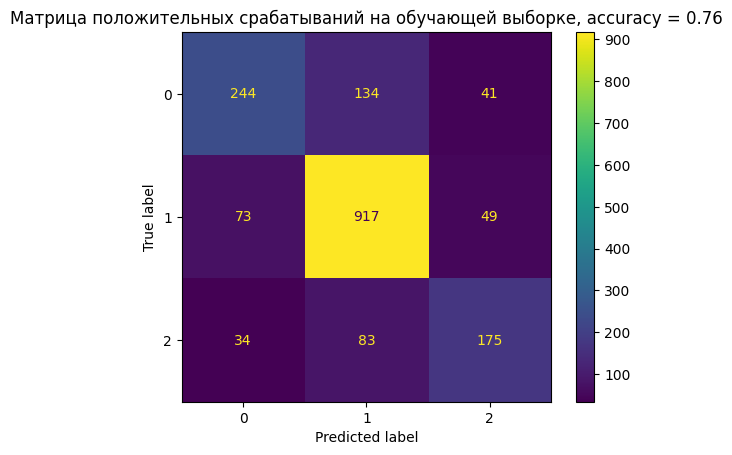

In [ ]:
tree_matrix = confusion_matrix(y_train, y_pred_train)
print(tree_matrix)
model_tree_3_accuracy_train = accuracy_score(y_train, y_pred_train)
AC = 'Матрица положительных срабатываний на обучающей выборке, accuracy = ' + str(round(model_tree_3_accuracy_train, 2))


disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

[[ 62  66  24]
 [ 33 396  33]
 [ 21  44  71]]


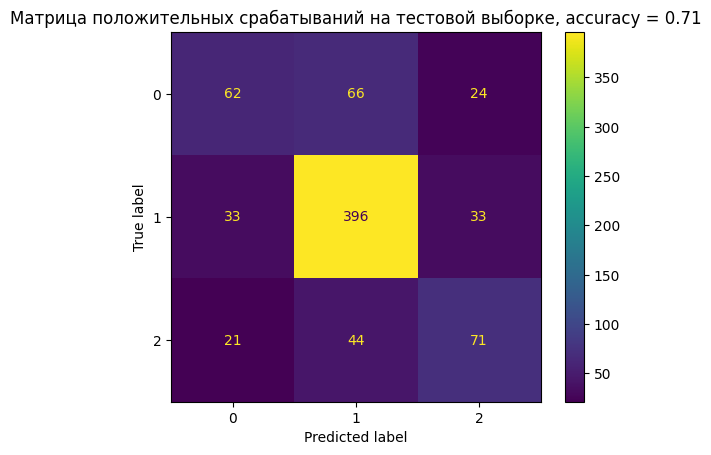

In [ ]:
tree_matrix = confusion_matrix(y_test, y_pred)
print(tree_matrix)
model_tree_3_accuracy_test = accuracy_score(y_test, y_pred)
AC = 'Матрица положительных срабатываний на тестовой выборке, accuracy = ' + str(round(model_tree_3_accuracy_test, 2))


disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

In [ ]:
model_tree_3_accuracy_train - model_tree_3_accuracy_test

0.05809523809523809

## Random forest = ансамблевый алгоритм

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Number of Storecards: 0.12953059192834984
Number of Loans: 0.0654646339188892
Number of Kids: 0.06350625406563513
Number of Credit Cards: 0.06025922061876062
Mortgage: 0.023404729583843514
Monthly Income_scale: 0.31979819046271557
Marital Status: 0.04122601446783764
How Paid?: 0.02023158081852305
Gender: 0.03601302394969927
Age_scale: 0.2405657601857462


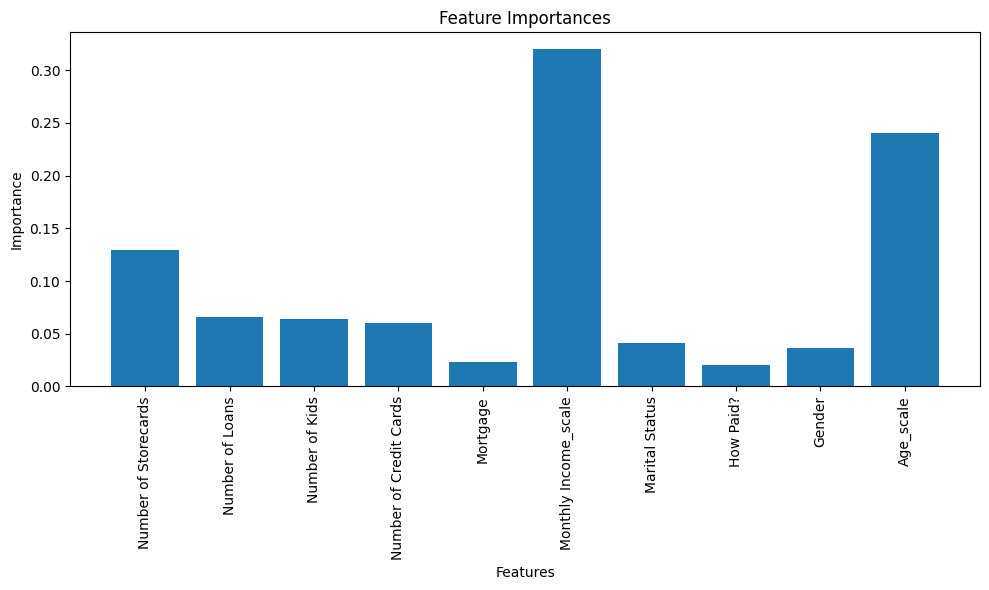

In [ ]:
importances = model.feature_importances_
sorted_index = np.argsort(names)[::-1]
sorted_feature_names = [names[i] for i in sorted_index]
for i in range(len(sorted_index)):
    print(f"{sorted_feature_names[i]}: {importances[sorted_index[i]]}")

# Создание графика значимостей переменных
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[sorted_index], align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
print("Accuracy for test sample:", accuracy_score(y_test, y_test_pred))
print("Accuracy for train sample:", accuracy_score(y_train, y_train_pred))

Accuracy for test sample: 0.7146666666666667
Accuracy for train sample: 1.0


[[ 64  62  26]
 [ 33 401  28]
 [ 20  45  71]]


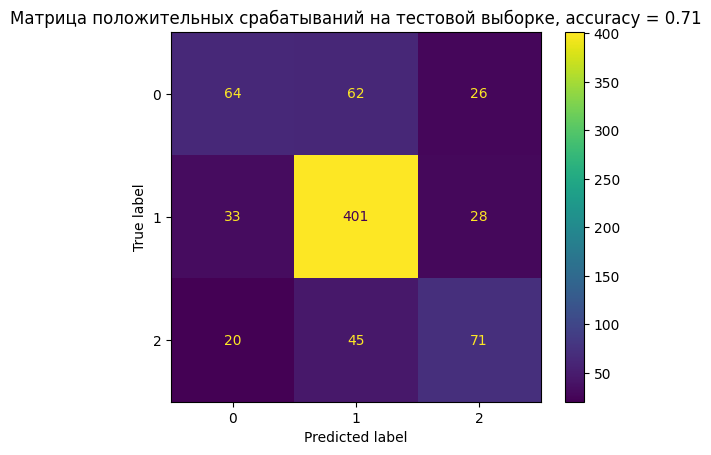

In [ ]:
tree_matrix = confusion_matrix(y_test, y_test_pred)
print(tree_matrix)
model_accuracy_test = accuracy_score(y_test, y_test_pred)
AC = 'Матрица положительных срабатываний на тестовой выборке, accuracy = ' + str(round(model_accuracy_test, 2))


disp_matrix = ConfusionMatrixDisplay(tree_matrix, display_labels=tree.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

## Логистическая регрессия при решении задачи классификации

In [ ]:
X = data[[ 'Age_scale', 'Monthly Income_scale']]
y = data['Mortgage']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

[[  1 166]
 [  1 582]]


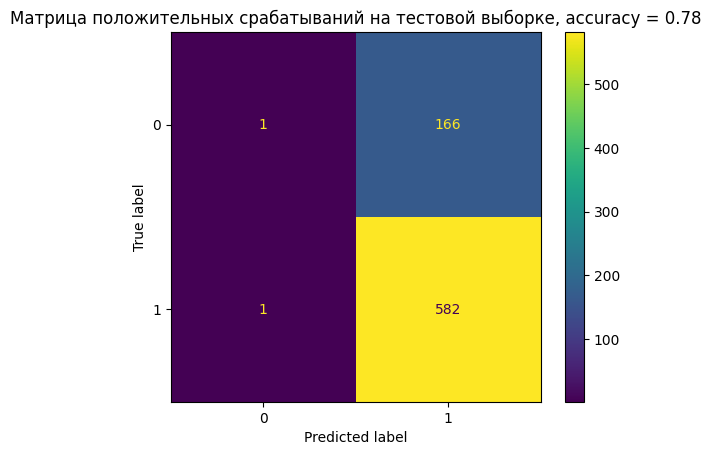

In [ ]:
model_matrix = confusion_matrix(y_test, y_pred) # for test sample


print(model_matrix)
model_accuracy_test = accuracy_score(y_test, y_pred)
AC = 'Матрица положительных срабатываний на тестовой выборке, accuracy = ' + str(round(model_accuracy_test, 2))


disp_matrix = ConfusionMatrixDisplay(model_matrix, display_labels=model.classes_)
disp_matrix.plot()
plt.title(AC)
plt.show()

In [ ]:
# найдем сдвиг и наклон для уравнения решающей границы
c, m = -model.intercept_ / model.coef_[0][1], -model.coef_[0][0] / model.coef_[0][1]
c, m

(array([-1.96858088]), 0.5313899055361897)

In [ ]:
# посмотрим на линию решающей границы
plt.figure(figsize = (16, 10))

xmin, xmax = min(X['Age_scale']), max(X['Monthly Income_scale'])
ymin, ymax = min(X['Monthly Income_scale']), max(X['Age_scale'])
xd = np.array([xmin, xmax])
xd

array([-1.40977187,  3.90057826])

<Figure size 1600x1000 with 0 Axes>

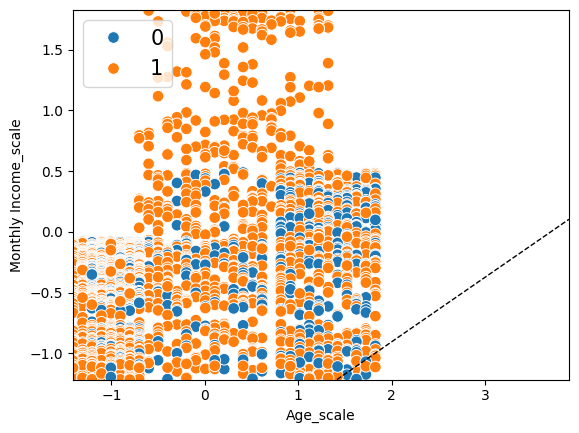

In [ ]:
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
sns.scatterplot(x= X['Age_scale'], y = X['Monthly Income_scale'], hue = y, s = 70)
plt.legend(loc = 'upper left', prop = {'size': 15})

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()